# SPGD_empiar10311

In [2]:
#%pip install "denoising @ git+https://github.com/vicente-gonzalez-ruiz/denoising"
!rm denoising
!ln -s ../../src/denoising denoising

In [3]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
use_OpenCV = True
local_debug = True

In [5]:
%pip install mrcfile

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import logging
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#from ipywidgets import *
import cv2
import time
#import kernels
import skimage
#from skimage import io as skimage_io
import mrcfile

In [9]:
import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [10]:
%pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
import information_theory  # pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"

  Cloning https://github.com/vicente-gonzalez-ruiz/information_theory to /tmp/pip-install-bxju8d6s/information-theory_5aace4b6a79c4de6bc7c81ab036d0a19
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/information_theory /tmp/pip-install-bxju8d6s/information-theory_5aace4b6a79c4de6bc7c81ab036d0a19
  Resolved https://github.com/vicente-gonzalez-ruiz/information_theory to commit 7aff04b2a037822c86232f487ded084f6d80b33e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [11]:
!ls -l 

total 411612
lrwxrwxrwx 1 vruiz vruiz        19 Oct 27 18:16 denoising -> ../../src/denoising
-rw-r--r-- 1 vruiz vruiz 419431424 May  5  2024 empiar10311_stack_crop.mrc
drwxr-xr-x 2 vruiz vruiz      4096 Oct  8 17:12 figs
lrwxrwxrwx 1 vruiz vruiz        48 Oct 27 17:50 information_theory -> ../../information_theory/src/information_theory/
-rw-r--r-- 1 vruiz vruiz     11650 Oct 11 19:48 OF_gaussian_image_denoising__FoilHole.ipynb
-rw-r--r-- 1 vruiz vruiz     14566 Oct 11 19:48 SPGD_Corbel.ipynb
-rw-r--r-- 1 vruiz vruiz   1138393 Oct 27 18:14 SPGD_empiar10311.ipynb
-rw-r--r-- 1 vruiz vruiz    814352 Oct 27 17:17 SPGD_epfl1.ipynb
-rw-r--r-- 1 vruiz vruiz     51226 Oct 11 19:48 SPGD_phantom.ipynb
-rw-r--r-- 1 vruiz vruiz     11368 Oct  8 17:12 SPGD.tex


In [12]:
if use_OpenCV:
    from denoising.volume.gaussian import Monochrome_Denoising as gaussian_denoising

In [13]:
vol_filename = "empiar10311_stack_crop.mrc"

In [14]:
from collections import namedtuple
Args = namedtuple("args", ["input", "output"])
fn, fe = vol_filename.split(".")
args = Args(vol_filename , fn + "_denoised." + fe)
print(args)

args(input='empiar10311_stack_crop.mrc', output='empiar10311_stack_crop_denoised.mrc')


In [15]:
%pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [16]:
%%bash -s "$args.input"
set -x
OUTPUT_FILENAME=$1
#rm -f $OUTPUT_FILENAME
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_" #https://drive.google.com/file/d/1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_/view?usp=drive_link
    #FILEID="1qe7d9dOJg1H3xlGy1DIgEdAnwuAgA1iB" # https://drive.google.com/file/d/1qe7d9dOJg1H3xlGy1DIgEdAnwuAgA1iB/view?usp=sharing
    #FILEID="1MZ05sO6lLDEvZRwSEzhSmm3kbaIuhvlq" # https://drive.google.com/file/d/1MZ05sO6lLDEvZRwSEzhSmm3kbaIuhvlq/view?usp=drive_link
    #FILEID="1iui018SGKa5nb0ybeoUAB7uCUhl9EJ5o" #https://drive.google.com/file/d/1iui018SGKa5nb0ybeoUAB7uCUhl9EJ5o/view?usp=sharing
    #wget --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O $OUTPUT_FILENAME #2> /dev/null
    #wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=FILEID" -O FILENAME && rm -rf /tmp/cookies.txt
    ~/envs/SPGD/bin/gdown https://drive.google.com/uc?id=$FILEID # pip install gdown
fi
ls -l $OUTPUT_FILENAME
set +x

+ OUTPUT_FILENAME=empiar10311_stack_crop.mrc
+ test '!' -f empiar10311_stack_crop.mrc
+ ls -l empiar10311_stack_crop.mrc


-rw-r--r-- 1 vruiz vruiz 419431424 May  5  2024 empiar10311_stack_crop.mrc


+ set +x


In [17]:
#noisy = skimage.io.imread(args.input, plugin="tifffile").astype(np.float32)
stack_MRC = mrcfile.open(args.input)
noisy = stack_MRC.data

In [18]:
Z_dim = noisy.shape[0]
Z2 = Z_dim//2

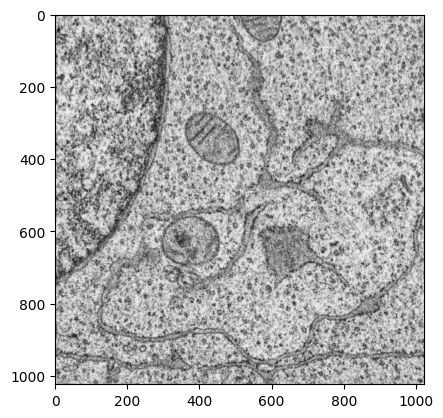

In [19]:
plt.imshow(noisy[Z2], cmap="gray")

In [20]:
def get_gaussian_kernel(sigma=1):
    number_of_coeffs = 3
    number_of_zeros = 0
    while number_of_zeros < 2 :
        delta = np.zeros(number_of_coeffs)
        delta[delta.size//2] = 1
        coeffs = scipy.ndimage.gaussian_filter1d(delta, sigma=sigma)
        number_of_zeros = coeffs.size - np.count_nonzero(coeffs)
        number_of_coeffs += 1
    return coeffs[1:-1]

std_dev = 2.0
sigma = np.array([std_dev, std_dev, std_dev])
kernel = [None]*3
kernel[0] = get_gaussian_kernel(sigma[0])
kernel[1] = get_gaussian_kernel(sigma[1])
kernel[2] = get_gaussian_kernel(sigma[2])

In [21]:
denoiser = gaussian_denoising(logger)
denoised = denoiser.filter(noisy, kernel)

[gaussian.py:130 filter()] mean=164.70201110839844


    0            0.22
    1            0.04
    2            0.04
    3            0.04
    4            0.04
    5            0.04
    6            0.04
    7            0.04
    8            0.03
    9            0.03
   10            0.03
   11            0.03
   12            0.03
   13            0.03
   14            0.04
   15            0.03
   16            0.03
   17            0.03
   18            0.04
   19            0.04
   20            0.03
   21            0.04
   22            0.03
   23            0.03
   24            0.03
   25            0.04
   26            0.04
   27            0.04
   28            0.04
   29            0.04
   30            0.04
   31            0.04
   32            0.04
   33            0.04
   34            0.04
   35            0.04
   36            0.04
   37            0.04
   38            0.03
   39            0.04
   40            0.03
   41            0.03
   42            0.03
   43            0.04
   44            0.04
   45     

[gaussian.py:132 filter()] filtered along Z


   99            0.04
    0            0.25
    1            0.00
    2            0.00
    3            0.00
    4            0.00
    5            0.00
    6            0.00
    7            0.00
    8            0.00
    9            0.00
   10            0.00
   11            0.00
   12            0.00
   13            0.00
   14            0.00
   15            0.00
   16            0.00
   17            0.00
   18            0.00
   19            0.00
   20            0.00
   21            0.00
   22            0.00
   23            0.00
   24            0.00
   25            0.00
   26            0.00
   27            0.00
   28            0.00
   29            0.00
   30            0.00
   31            0.00
   32            0.00
   33            0.00
   34            0.00
   35            0.00
   36            0.00
   37            0.00
   38            0.00
   39            0.00
   40            0.00
   41            0.00
   42            0.00
   43            0.00
   44     

[gaussian.py:134 filter()] filtered along Y


  971            0.00
  972            0.00
  973            0.00
  974            0.00
  975            0.00
  976            0.00
  977            0.00
  978            0.00
  979            0.00
  980            0.00
  981            0.00
  982            0.00
  983            0.00
  984            0.00
  985            0.00
  986            0.00
  987            0.00
  988            0.00
  989            0.00
  990            0.00
  991            0.00
  992            0.00
  993            0.00
  994            0.00
  995            0.00
  996            0.00
  997            0.00
  998            0.00
  999            0.00
 1000            0.00
 1001            0.00
 1002            0.00
 1003            0.00
 1004            0.00
 1005            0.00
 1006            0.00
 1007            0.00
 1008            0.00
 1009            0.00
 1010            0.00
 1011            0.00
 1012            0.00
 1013            0.00
 1014            0.00
 1015            0.00
 1016     

[gaussian.py:136 filter()] filtered along X


 1023            0.01


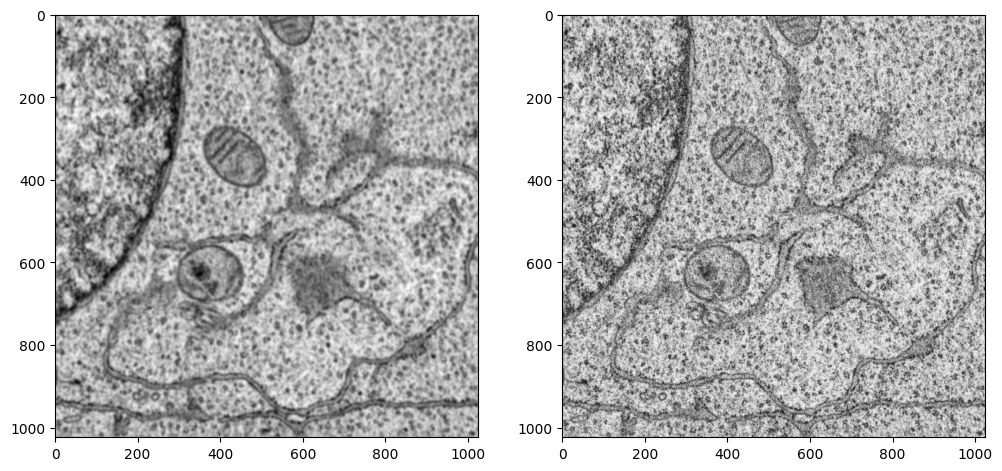

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(denoised[Z2], cmap="gray")
axes[1].imshow(noisy[Z2], cmap="gray")
plt.show()

In [23]:
#if use_OpenCV:
#    from denoising.volume.OF_gaussian import Monochrome_Denoising as OF_gaussian_denoising
import denoising.volume.OF_gaussian as SPGD

In [24]:
denoiser = SPGD.Monochrome_Denoising(logger)

[OF_gaussian.py:31 __init__()] logger: <Logger __main__ (INFO)>
[OF_gaussian.py:31 __init__()] Q_estimator: None
[OF_gaussian.py:31 __init__()] show_event: <threading.Event at 0x7f94db282870: unset>
[OF_gaussian.py:31 __init__()] logger_daemon: <Thread(Thread-8 (show_log), started daemon 140277308249792)>
[OF_gaussian.py:31 __init__()] time_0: 136571.281447575
[OF_gaussian.py:31 __init__()] pyramid_levels: 1
[OF_gaussian.py:31 __init__()] window_side: 5
[OF_gaussian.py:31 __init__()] sigma_poly: 1.0
[OF_gaussian.py:31 __init__()] num_iters: 3
[OF_gaussian.py:31 __init__()] N_poly: 5


In [25]:
denoised = denoiser.filter(noisy, kernel, l=2, w=5)

[gaussian.py:130 filter()] mean=164.70201110839844


    0            0.24
    1            2.60
    2            2.45
    3            2.47
    4            2.56
    5            2.60
    6            2.48
    7            2.62
    8            2.57
    9            2.47
   10            2.47
   11            2.60
   12            2.49
   13            2.48
   14            2.42
   15            2.48
   16            2.40
   17            2.44
   18            2.46
   19            2.39
   20            2.43
   21            2.50
   22            2.41
   23            2.56
   24            2.53
   25            2.58
   26            2.49
   27            2.45
   28            2.49
   29            2.46
   30            2.46
   31            2.44
   32            2.41
   33            2.49
   34            2.50
   35            2.52
   36            2.43
   37            2.46
   38            2.52
   39            2.57
   40            2.57
   41            2.56
   42            2.48
   43            2.55
   44            2.53
   45     

[gaussian.py:132 filter()] filtered along Z


    0            2.62
    1            0.21
    2            0.21
    3            0.21
    4            0.21
    5            0.21
    6            0.21
    7            0.21
    8            0.21
    9            0.21
   10            0.21
   11            0.21
   12            0.21
   13            0.21
   14            0.21
   15            0.21
   16            0.21
   17            0.21
   18            0.21
   19            0.21
   20            0.21
   21            0.21
   22            0.21
   23            0.21
   24            0.21
   25            0.21
   26            0.22
   27            0.21
   28            0.21
   29            0.21
   30            0.21
   31            0.21
   32            0.21
   33            0.21
   34            0.21
   35            0.21
   36            0.21
   37            0.21
   38            0.21
   39            0.21
   40            0.21
   41            0.21
   42            0.21
   43            0.21
   44            0.22
   45     

[gaussian.py:134 filter()] filtered along Y


    0            0.41
    1            0.24
    2            0.24
    3            0.24
    4            0.24
    5            0.24
    6            0.26
    7            0.25
    8            0.26
    9            0.25
   10            0.24
   11            0.24
   12            0.24
   13            0.24
   14            0.24
   15            0.24
   16            0.24
   17            0.24
   18            0.24
   19            0.25
   20            0.25
   21            0.24
   22            0.24
   23            0.25
   24            0.25
   25            0.24
   26            0.24
   27            0.24
   28            0.24
   29            0.24
   30            0.26
   31            0.26
   32            0.25
   33            0.24
   34            0.25
   35            0.26
   36            0.26
   37            0.26
   38            0.26
   39            0.26
   40            0.25
   41            0.24
   42            0.24
   43            0.24
   44            0.24
   45     

[gaussian.py:136 filter()] filtered along X


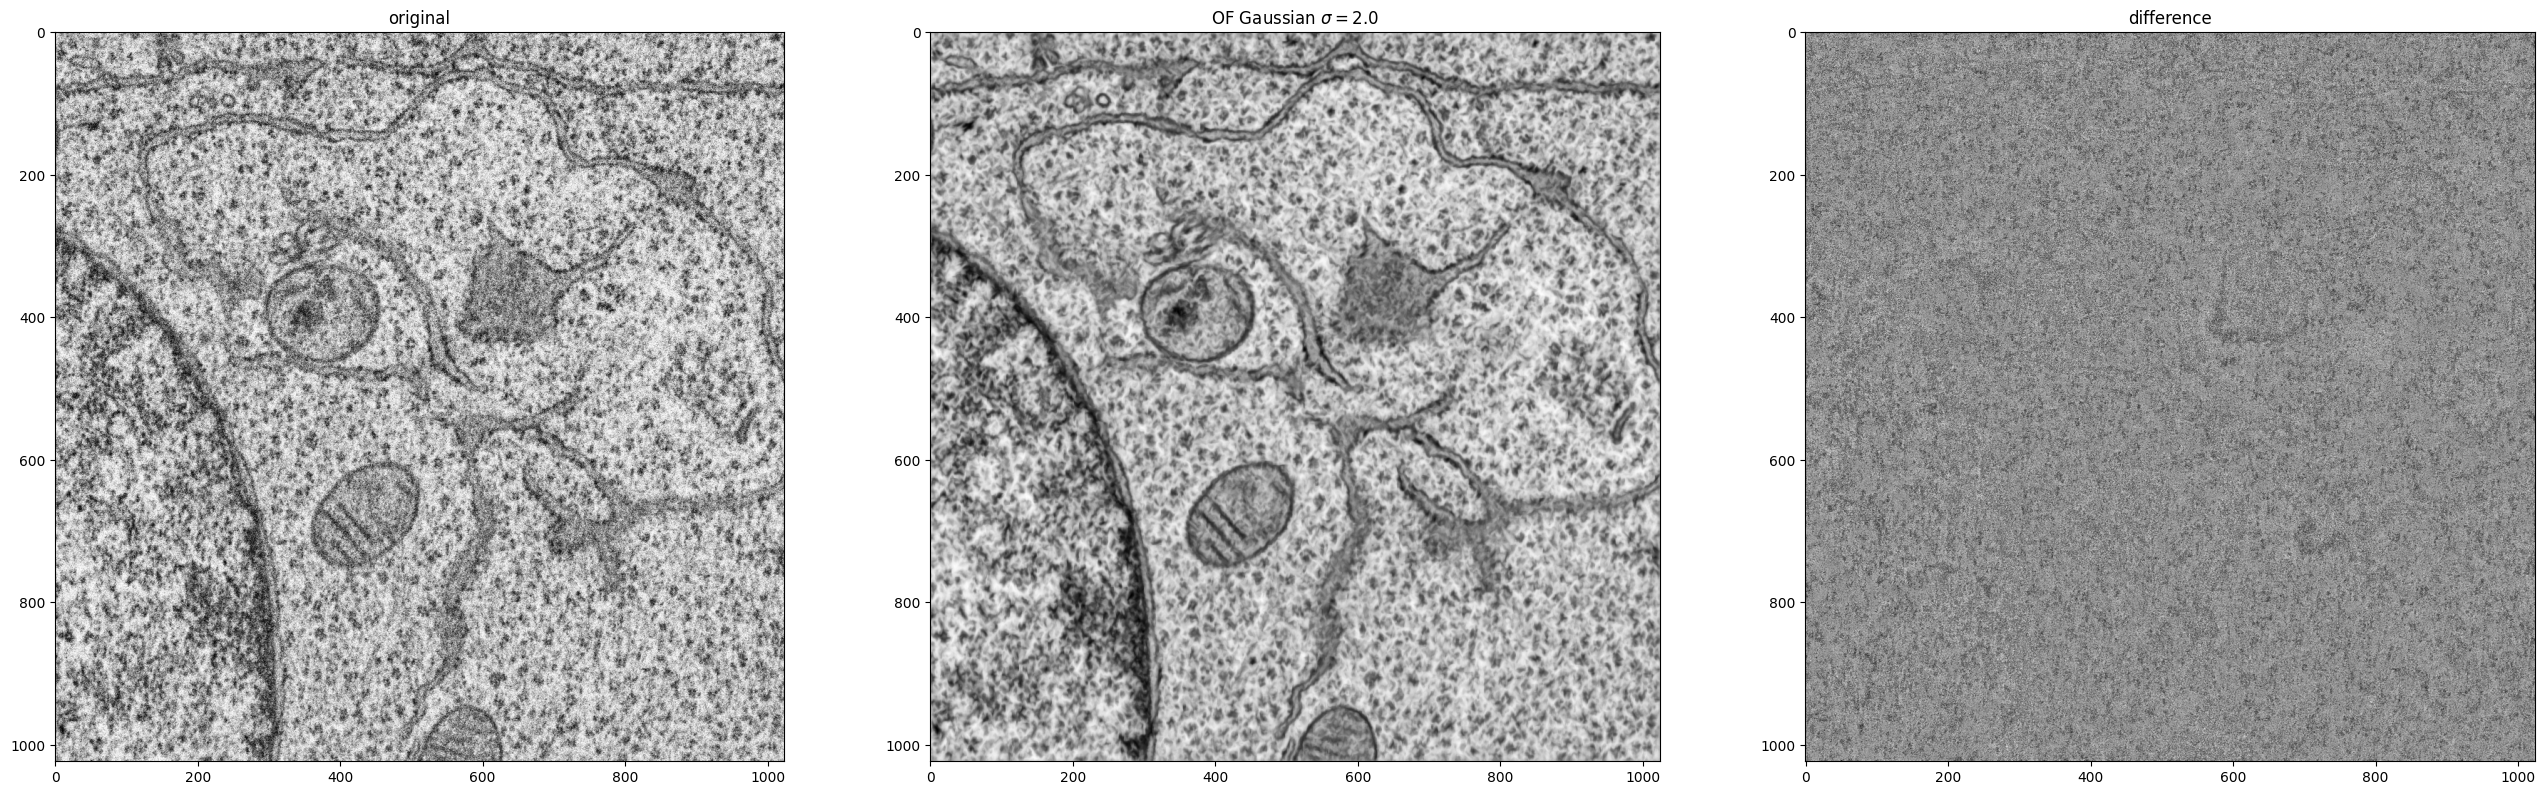

In [26]:
figure(figsize=(32, 32))
plt.subplot(1, 3, 1)
plt.title("original")
slice_idx = noisy.shape[0]//2
imgplot = plt.imshow(noisy[slice_idx][::-1, :], cmap="gray")
plt.subplot(1, 3, 2)
title = f"OF Gaussian $\\sigma={std_dev}$"
plt.title(title)
plt.imshow(denoised[slice_idx][::-1, :], cmap="gray")
plt.subplot(1, 3, 3)
plt.title("difference")
plt.imshow(noisy[slice_idx][::-1, :] - denoised[slice_idx][::-1, :], cmap="gray")
plt.show()

In [28]:
fig_single, ax_single = plt.subplots(figsize=(10, 10))
ax_single.imshow(denoised[slice_idx][::-1, :], cmap="gray")
ax_single.set_title(title)
fig_single.savefig(title + ".png")
plt.close(fig_single)

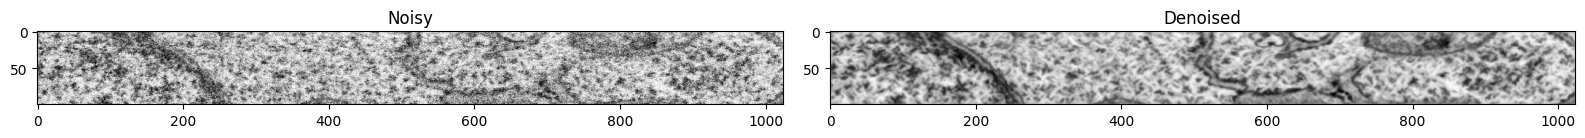

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(16, 32))
slice_idx = noisy.shape[1]//2
axs[0].imshow(noisy[:, slice_idx], cmap="gray")
axs[0].set_title(f"Noisy")
axs[1].imshow(denoised[:, slice_idx], cmap="gray")
axs[1].set_title(f"Denoised")
fig.tight_layout()
plt.show()

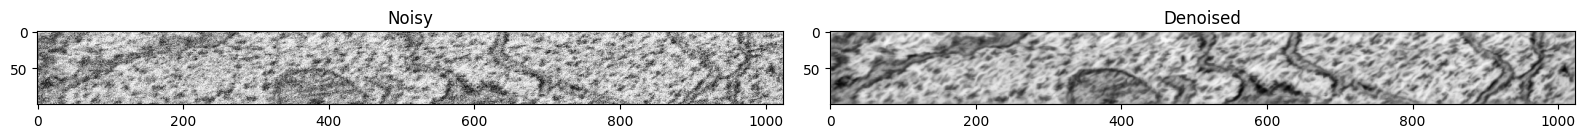

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(16, 32))
slice_idx = noisy.shape[2]//2
axs[0].imshow(noisy[:, :, slice_idx], cmap="gray")
axs[0].set_title(f"Noisy")
axs[1].imshow(denoised[:, :, slice_idx], cmap="gray")
axs[1].set_title(f"Denoised")
fig.tight_layout()
plt.show()

In [31]:
with mrcfile.new(f"{fn}_{title}.mrc", overwrite=True) as mrc:
            mrc.set_data(denoised.astype(np.float32))
            mrc.data

In [32]:
f"{fn}_{title}.mrc"

'empiar10311_stack_crop_OF Gaussian $\\sigma=2.0$.mrc'

In [ ]:
input()

In [ ]:
GT = skimage_io.imread("http://www.hpca.ual.es/~vruiz/images/barb.png")

In [ ]:
padded_GT = np.zeros(shape=(GT.shape[0]+32, GT.shape[1]+32), dtype=np.uint8)
padded_GT[16:-16, 16:-16] = GT
GT = padded_GT

In [ ]:
w = 7
Z = 32

In [ ]:
mean = 0
var = 1000
sigma = 20 #var**0.5
noise = np.random.normal(mean, sigma, GT.shape).reshape(GT.shape)
noisy = np.clip(a=GT.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

In [ ]:
noisy = np.array([noisy]*Z)

In [ ]:
Z2 = Z//2

In [ ]:
plt.imshow(noisy[Z2], cmap="gray")

In [ ]:
skimage.io.imsave(arr=noisy, fname="noisy.tif", plugin="tifffile")

In [ ]:
plt.imshow(noisy[:, :, 256], cmap="gray")

In [ ]:
sigma = np.array([1.5, 1.5, 1.5])
kernel = [None]*3
kernel[0] = get_gaussian_kernel(sigma[0])
kernel[1] = get_gaussian_kernel(sigma[1])
kernel[2] = get_gaussian_kernel(sigma[2])
for i in range(3):
    print(len(kernel[i]))

In [ ]:
denoised = denoiser.filter(noisy, kernel, l=1, w=5)

In [ ]:
plt.imshow(denoised[:, :, 256], cmap="gray")

In [ ]:
sum_denoised = np.zeros_like(denoised[0])
for z in range(0, Z):
    sum_denoised += denoised[z]
    plt.imshow(denoised[z], cmap="gray")
    plt.show()
avg_denoised = sum_denoised / Z

In [ ]:
print(f"{information_theory.distortion.PSNR(denoised[Z2], GT):4.2f} dB")

In [ ]:
print(f"{information_theory.distortion.PSNR(noisy[Z2], GT):4.2f} dB")

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(GT, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(noisy[Z2], cmap="gray")
axs[1].set_title(f"Noisy ({information_theory.distortion.PSNR(noisy[Z2], GT):4.2f} dB)")
axs[2].imshow(avg_denoised, cmap="gray")
#axs[2].set_title(f"Denoised ({information_theory.distortion.PSNR(avg_denoised, GT):4.2f} dB)")
axs[2].set_title(f"Denoised ({information_theory.distortion.PSNR(denoised[Z2], GT):4.2f} dB)")
fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].imshow(avg_denoised, cmap="gray")
#axes[1].imshow(noisy[0], cmap="gray")
axes[1].imshow(denoised[Z2], cmap="gray")
plt.show()

In [ ]:
input()

In [ ]:
if local_debug:
    !ln -sf ../../motion_estimation/src/motion_estimation/ .
else:
    !pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"
if use_OpenCV:
    from motion_estimation._2D.farneback_OpenCV import Estimator_in_CPU as Estimator
else:
    from motion_estimation._2D.farneback_python import Estimator
from motion_estimation._2D.project import project

In [ ]:
from numpy.linalg import LinAlgError

In [ ]:
noisy = skimage.io.imread("small_vol.tif", plugin="tifffile").astype(np.float32)

In [ ]:
N = 32
N2 = N//2
plt.imshow(noisy[N2], cmap="gray")

In [ ]:
def get_gaussian_kernel(sigma=1):
    number_of_coeffs = 3
    number_of_zeros = 0
    while number_of_zeros < 2 :
        delta = np.zeros(number_of_coeffs)
        delta[delta.size//2] = 1
        coeffs = scipy.ndimage.gaussian_filter1d(delta, sigma=sigma)
        number_of_zeros = coeffs.size - np.count_nonzero(coeffs)
        number_of_coeffs += 1
    return coeffs[1:-1]

OFCA_EXTENSION_MODE = cv2.BORDER_REPLICATE
OF_LEVELS = 0
OF_WINDOW_SIZE = 5
OF_ITERS = 3
OF_POLY_N = 5
OF_POLY_SIGMA = 0.5 #1.2
SIGMA = 2.0

def warp_slice(reference, flow):
    height, width = flow.shape[:2]
    map_x = np.tile(np.arange(width), (height, 1))
    map_y = np.swapaxes(np.tile(np.arange(height), (width, 1)), 0, 1)
    map_xy = (flow + np.dstack((map_x, map_y))).astype('float32')
    warped_slice = cv2.remap(reference, map_xy, None, interpolation=cv2.INTER_LINEAR, borderMode=OFCA_EXTENSION_MODE)
    return warped_slice

def get_flow(reference, target, l=OF_LEVELS, w=OF_WINDOW_SIZE, prev_flow=None):
    flow = cv2.calcOpticalFlowFarneback(prev=target, next=reference, flow=prev_flow, pyr_scale=0.5, levels=l, winsize=w, iterations=OF_ITERS, poly_n=OF_POLY_N, poly_sigma=OF_POLY_SIGMA, flags=cv2.OPTFLOW_USE_INITIAL_FLOW)
    return flow

def _get_flow(reference, target, l=OF_LEVELS, w=OF_WINDOW_SIZE, prev_flow=None):
    flow = cv2.calcOpticalFlowFarneback(prev=target, next=reference, flow=prev_flow, pyr_scale=0.5, levels=l, winsize=w, iterations=OF_ITERS, poly_n=OF_POLY_N, poly_sigma=OF_POLY_SIGMA, flags=0)
    return flow

def OF_filter_along_Z(vol, kernel, l, w, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0] + kernel.size, shape_of_vol[1], shape_of_vol[2]), fill_value=mean)
    padded_vol[kernel.size//2:shape_of_vol[0] + kernel.size//2, :, :] = vol
    Z_dim = vol.shape[0]
    for z in range(Z_dim):
        tmp_slice = np.zeros_like(vol[z]).astype(np.float32)
        assert kernel.size % 2 != 0 # kernel.size must be odd
        prev_flow = np.zeros(shape=(shape_of_vol[1], shape_of_vol[2], 2), dtype=np.float32)
        for i in range((kernel.size//2) - 1, -1, -1):
            flow = get_flow(padded_vol[z + i, :, :], vol[z, :, :], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow
            OF_compensated_slice = warp_slice(padded_vol[z + i, :, :], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        tmp_slice += vol[z, :, :] * kernel[kernel.size//2]
        prev_flow = np.zeros(shape=(shape_of_vol[1], shape_of_vol[2], 2), dtype=np.float32)
        for i in range(kernel.size//2+1, kernel.size):
            flow = get_flow(padded_vol[z + i, :, :], vol[z, :, :], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow
            OF_compensated_slice = warp_slice(padded_vol[z + i, :, :], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        filtered_vol[z, :, :] = tmp_slice
    return filtered_vol

def no_OF_filter_along_Z(vol, kernel, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0] + kernel.size, shape_of_vol[1], shape_of_vol[2]), fill_value=mean)
    padded_vol[kernel.size//2:shape_of_vol[0] + kernel.size//2, ...] = vol
    Z_dim = vol.shape[0]
    for z in range(Z_dim):
        tmp_slice = np.zeros_like(vol[z, :, :]).astype(np.float32)
        for i in range(kernel.size):
            tmp_slice += padded_vol[z + i, :, :] * kernel[i]
        filtered_vol[z, :, :] = tmp_slice
    return filtered_vol

def OF_filter_along_Y(vol, kernel, l, w, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0], shape_of_vol[1] + kernel.size, shape_of_vol[2]), fill_value=mean)
    padded_vol[:, kernel.size//2:shape_of_vol[1] + kernel.size//2, :] = vol
    Y_dim = vol.shape[1]
    for y in range(Y_dim):
        tmp_slice = np.zeros_like(vol[:, y, :]).astype(np.float32)
        assert kernel.size % 2 != 0 # kernel.size must be odd
        prev_flow = np.zeros(shape=(shape_of_vol[0], shape_of_vol[2], 2), dtype=np.float32)
        for i in range((kernel.size//2) - 1, -1, -1):
            flow = get_flow(padded_vol[:, y + i, :], vol[:, y, :], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow                     
            OF_compensated_slice = warp_slice(padded_vol[:, y + i, :], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        tmp_slice += vol[:, y, :] * kernel[kernel.size//2]
        prev_flow = np.zeros(shape=(shape_of_vol[0], shape_of_vol[2], 2), dtype=np.float32)
        for i in range(kernel.size//2+1, kernel.size):
            flow = get_flow(padded_vol[:, y + i, :], vol[:, y, :], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow                      
            OF_compensated_slice = warp_slice(padded_vol[:, y + i, :], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        filtered_vol[:, y, :] = tmp_slice
    return filtered_vol

def no_OF_filter_along_Y(vol, kernel, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0], shape_of_vol[1] + kernel.size, shape_of_vol[2]), fill_value=mean)
    padded_vol[:, kernel.size//2:shape_of_vol[1] + kernel.size//2, :] = vol
    Y_dim = vol.shape[1]
    for y in range(Y_dim):
        tmp_slice = np.zeros_like(vol[:, y, :]).astype(np.float32)
        for i in range(kernel.size):
            tmp_slice += padded_vol[:, y + i, :] * kernel[i]
        filtered_vol[:, y, :] = tmp_slice
    return filtered_vol

def OF_filter_along_X(vol, kernel, l, w, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0], shape_of_vol[1], shape_of_vol[2] + kernel.size), fill_value=mean)
    padded_vol[:, :, kernel.size//2:shape_of_vol[2] + kernel.size//2] = vol
    X_dim = vol.shape[2]
    for x in range(X_dim):
        tmp_slice = np.zeros_like(vol[:, :, x]).astype(np.float32)
        assert kernel.size % 2 != 0 # kernel.size must be odd
        prev_flow = np.zeros(shape=(shape_of_vol[0], shape_of_vol[1], 2), dtype=np.float32)
        for i in range((kernel.size//2) - 1, -1, -1):
            flow = get_flow(padded_vol[:, :, x + i], vol[:, :, x], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow
            OF_compensated_slice = warp_slice(padded_vol[:, :, x + i], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        tmp_slice += vol[:, :, x] * kernel[kernel.size//2]
        prev_flow = np.zeros(shape=(shape_of_vol[0], shape_of_vol[1], 2), dtype=np.float32)
        for i in range(kernel.size//2+1, kernel.size):
            flow = get_flow(padded_vol[:, :, x + i], vol[:, :, x], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow
            OF_compensated_slice = warp_slice(padded_vol[:, :, x + i], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        filtered_vol[:, :, x] = tmp_slice
    return filtered_vol

def no_OF_filter_along_X(vol, kernel, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0], shape_of_vol[1], shape_of_vol[2] + kernel.size), fill_value=mean)
    padded_vol[:, :, kernel.size//2:shape_of_vol[2] + kernel.size//2] = vol
    X_dim = vol.shape[2]
    for x in range(X_dim):
        tmp_slice = np.zeros_like(vol[:, :, x]).astype(np.float32)
        for i in range(kernel.size):
            tmp_slice += padded_vol[:, :, x + i] * kernel[i]
        filtered_vol[:, :, x] = tmp_slice
    return filtered_vol

def OF_filter(vol, kernel, l, w):
    mean = vol.mean()
    print("\nZ")
    print(vol.dtype)
    print(f"max(vol) = {np.max(vol)}")
    print(f"min(vol) = {np.min(vol)}")
    print(f"avg(vol) = {np.average(vol)}")
    filtered_vol_Z = OF_filter_along_Z(vol, kernel[0], l, w, mean)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(vol[8].astype(np.float32), cmap="gray")
    axes[1].imshow(vol[8] - filtered_vol_Z[8], cmap="gray")
    plt.show()
    print(f"max(vol) = {np.max(vol)}")
    print(f"min(vol) = {np.min(vol)}")
    print(f"avg(vol) = {np.average(vol)}")
    print(f"max(filtered_vol_Z) = {np.max(filtered_vol_Z)}")
    print(f"min(filtered_vol_Z) = {np.min(filtered_vol_Z)}")
    print(f"avg(filtered_vol_Z) = {np.average(filtered_vol_Z)}")
    #filtered_vol_Z[...] = vol
    #print(filtered_vol_Z.dtype)
    #return filtered_vol_Z
    print("\nY")
    filtered_vol_ZY = OF_filter_along_Y(filtered_vol_Z, kernel[1], l, w, mean)
    #filtered_vol_ZY = OF_filter_along_Y(vol.astype(np.float32), kernel[1], l, w, mean)
    print("\nX")
    filtered_vol_ZYX = OF_filter_along_X(filtered_vol_ZY, kernel[2], l, w, mean)
    return filtered_vol_ZYX

def no_OF_filter(vol, kernel):
    mean = vol.mean()
    filtered_vol_Z = no_OF_filter_along_Z(vol, kernel[0], mean)
    filtered_vol_ZY = no_OF_filter_along_Y(filtered_vol_Z, kernel[1], mean)
    filtered_vol_ZYX = no_OF_filter_along_X(filtered_vol_ZY, kernel[2], mean)
    return filtered_vol_ZYX

In [ ]:
sigma = np.array([2.0, 2.0, 2.0])
kernel = [None]*3
kernel[0] = get_gaussian_kernel(sigma[0])
kernel[1] = get_gaussian_kernel(sigma[1])
kernel[2] = get_gaussian_kernel(sigma[2])

In [ ]:
denoised = no_OF_filter(noisy, kernel)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(denoised[16], cmap="gray")
axes[1].imshow(noisy[16], cmap="gray")
plt.show()

In [ ]:
denoised = OF_filter(noisy, kernel, 1, 5)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(denoised[N2], cmap="gray")
axes[1].imshow(noisy[N2], cmap="gray")
plt.show()

In [ ]:
input()

In [ ]:
from skimage import io as skimage_io
GT = skimage_io.imread("http://www.hpca.ual.es/~vruiz/images/barb.png")

In [ ]:
mean = 0
var = 1000
sigma = 20 #var**0.5
noise = np.random.normal(mean, sigma, GT.shape).reshape(GT.shape)
noisy = np.clip(a=GT.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

In [ ]:
N = 16
N2 = N//2
noisy = np.array([noisy]*N)

In [ ]:
noisy.shape

In [ ]:
plt.imshow(noisy[N2], cmap="gray")

In [ ]:
plt.imshow(noisy[:, :, 256], cmap="gray")

In [ ]:
denoised = OF_filter(noisy, kernel, 1, 5)

In [ ]:
plt.imshow(denoised[:, :, 256], cmap="gray")

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].imshow(denoised[1], cmap="gray")
axes[1].imshow(noisy[N2], cmap="gray")
plt.show()

In [ ]:
input()

In [ ]:
def get_kernel(sigma=1.5):
    number_of_coeffs = 3
    number_of_zeros = 0
    while number_of_zeros < 2:
        delta = np.zeros(number_of_coeffs)
        delta[delta.size//2] = 1
        coeffs = scipy.ndimage.gaussian_filter1d(delta, sigma=sigma)
        number_of_zeros = coeffs.size - np.count_nonzero(coeffs)
        number_of_coeffs += 1
    return coeffs[1:-1]

In [ ]:
def filter_Z(vol, kernel, mean):
    KL = kernel.size
    KL2 = KL//2
    extended_vol = np.full(fill_value=mean, shape=(vol.shape[0] + KL, vol.shape[1], vol.shape[2]))
    extended_vol[KL2:vol.shape[0] + KL2, :, :] = vol[:, :, :]
    filtered_vol = np.empty_like(vol, dtype=np.float32)
    Z_dim = vol.shape[0]
    Y_dim = vol.shape[1]
    X_dim = vol.shape[2]
    filtered_YX_plane = np.empty(shape=(Y_dim, X_dim), dtype=np.float32)
    for z in range(Z_dim):
        print(z, end=' ')
        #vertical_line = np.zeros(N_rows, dtype=np.float32)
        filtered_YX_plane.fill(0)
        for i in range(KL2 - 1, -1, -1):
            warped_plane = project_A_to_B(A=extended_vol[z + i, ...], B=extended_vol[z, ...])
            filtered_YX_plane += warped_plane * kernel[i]
        filtered_YX_plane += warped_plane * kernel[KL2]
        for i in range(KL2 + 1, KL):
            warped_plane = project_A_to_B(A=extended_vol[z + i, ...], B=extended_vol[z, ...])
            filtered_YX_plane += warped_plane * kernel[i]     
        filtered_vol[z, :, :] = filtered_YX_plane[:, :]
    return filtered_vol
        
def _filter_Z(vol, kernel, mean):
    KL = kernel.size
    KL2 = KL//2
    extended_vol = np.full(fill_value=mean, shape=(vol.shape[0] + KL, vol.shape[1], vol.shape[2]))
    extended_vol[KL2:vol.shape[0] + KL2, ...] = vol[...]
    filtered_vol = []
    Z_dim = vol.shape[0]
    Y_dim = vol.shape[1]
    X_dim = vol.shape[2]
    for z in range(Z_dim):
        YX_plane = np.zeros(shape=(Y_dim, X_dim), dtype=np.float32)
        for i in range(KL2 - 1, -1, -1):
            plane = project_A_to_B(A=extended_vol[z + i, ...], B=extended_vol[z, ...])
            YX_plane += plane * kernel[i]
        YX_plane += plane * kernel[KL2]
        for i in range(KL2 + 1, KL):
            plane = project_A_to_B(A=extended_vol[z + i, ...], B=extended_vol[z, ...])
            YX_plane += plane * kernel[i]            
        filtered_vol.append(YX_plane)
    filtered_vol = np.stack(filtered_vol, axis=0)
    return filtered_vol

def filter_Y(vol, kernel, mean):
    vol = np.transpose(vol, (1, 0, 2))
    filtered_vol = filter_Z(vol, kernel, mean)
    filtered_vol = np.transpose(filtered_vol, (1, 0, 2))
    return filtered_vol

def _filter_Y(vol, kernel, mean):
    KL = kernel.size
    KL2 = KL//2
    extended_vol = np.full(fill_value=mean, shape=(vol.shape[0], vol.shape[1] + KL, vol.shape[2]))
    extended_vol[:, KL2:vol.shape[1] + KL2, :] = vol[...]
    filtered_vol = []
    Z_dim = vol.shape[0]
    Y_dim = vol.shape[1]
    X_dim = vol.shape[2]
    for y in range(Y_dim):
        ZX_plane = np.zeros(shape=(Z_dim, X_dim), dtype=np.float32)
        for i in range(KL):
            plane = project_A_to_B(A=extended_vol[:, y + i, :], B=extended_vol[:, y, :])
            ZX_plane += plane * kernel[i]
        filtered_vol.append(ZX_plane)
    filtered_vol = np.stack(filtered_vol, axis=1)
    return filtered_vol

def filter_X(vol, kernel, mean):
    vol = np.transpose(vol, (2, 1, 0))
    filtered_vol = filter_Z(vol, kernel, mean)
    filtered_vol = np.transpose(filtered_vol, (2, 1, 0))
    return filtered_vol

def _filter_X(vol, kernel, mean):
    KL = kernel.size
    KL2 = KL//2
    extended_vol = np.full(fill_value=mean, shape=(vol.shape[0], vol.shape[1], vol.shape[2] + KL))
    extended_vol[..., KL2:vol.shape[2] + KL2] = vol[...]
    filtered_vol = []
    Z_dim = vol.shape[0]
    Y_dim = vol.shape[1]
    X_dim = vol.shape[2]
    for x in range(X_dim):
        ZY_plane = np.zeros(shape=(Z_dim, Y_dim), dtype=np.float32)
        for i in range(KL):
            plane = project_A_to_B(A=extended_vol[..., x + i], B=extended_vol[..., x])
            ZY_plane += plane * kernel[i]
        filtered_vol.append(ZY_plane)
    filtered_vol = np.stack(filtered_vol, axis=2)
    return filtered_vol

def filter(vol, kernel, mean):
    vol_z = filter_Z(vol, kernel, mean)
    vol_y = filter_Y(vol_z, kernel, mean)
    vol_x = filter_X(vol_y, kernel, mean)
    return vol_x

In [ ]:
def project_A_to_B(A, B):
    return A

In [ ]:
kernel = get_kernel(2.5)
print(kernel)
print(np.sum(kernel))
plt.plot(kernel)
plt.show()

In [ ]:
denoised = filter(noisy, kernel, mean=128)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(denoised[N2], cmap="gray")
axes[1].imshow(noisy[N2], cmap="gray")
plt.show()

In [ ]:
def project(logger,
            image,
            flow,
            interpolation_mode=cv2.INTER_LINEAR,
            extension_mode=cv2.BORDER_REPLICATE):
    
    logger.info(f"image.shape={image.shape}")
    
    height, width = flow.shape[:2]
    map_x = np.tile(np.arange(width), (height, 1))
    map_y = np.swapaxes(np.tile(np.arange(height), (width, 1)), 0, 1)
    map_xy = (flow + np.dstack((map_x, map_y))).astype('float32')
    projection = cv2.remap(
        image,
        map_xy,
        None,
        interpolation=interpolation_mode,
        borderMode=extension_mode)
    
    return projection

In [ ]:
def get_flow(
        reference,
        target,
        l=3,
        w=5,
        prev_flow=None):
    if __debug__:
        time_0 = time.perf_counter()
    flow = cv2.calcOpticalFlowFarneback(
        prev=target,
        next=reference,
        flow=None,
        pyr_scale=0.5,
        levels=l,
        winsize=w,
        iterations=3,
        poly_n=5,
        poly_sigma=1.1,
        flags=0)
    if __debug__:
        time_1 = time.perf_counter()
        logging.debug(f"OF computed in {1000*(time_1 - time_0):4.3f} ms, \
max_X={np.max(flow[0]):+3.2f}, min_X={np.min(flow[0]):+3.2f}, \
max_Y={np.max(flow[1]):+3.2f}, min_Y={np.min(flow[1]):+3.2f}")
    return flow

In [ ]:
estimator = Estimator(logger, pyr_levels=3, sigma_poly=0.5, win_side=5, num_iters=3, flags=0)

def project_A_to_B(A, B):
    try:
        flow = get_flow(target=B, reference=A, prev_flow=None)
    except LinAlgError as e:
        print(f"Caught exception: {e}")
        self.counter += 1
        return A
    projection = project(logger, image=A.astype(np.uint8), flow=flow)
    return projection

In [ ]:
denoised = filter(noisy, kernel, mean=128)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(denoised[16], cmap="gray")
axes[1].imshow(noisy[16], cmap="gray")
plt.show()

In [ ]:
input()

In [ ]:
import denoising.image.OF_gaussian as denoising

In [ ]:
if use_OpenCV:
    denoiser = gaussian_denoising.Monochrome_Image_OF_Gaussian_Denoising(sigma_gaussian=sigma_gaussian, l=3, w=5, sigma_OF=1.0, verbosity=logging.DEBUG)
else:
    denoiser = denoising.Monochrome_Denoising(logger, pyr_levels=2, win_side=27, num_iters=3, sigma_poly=4.0)

In [ ]:
kernel = denoiser.get_kernel(1.5)
print(kernel)
print(np.sum(kernel))
plt.plot(kernel)
plt.show()

In [ ]:
denoised = filter(vol, kernel)

In [ ]:
denoised = np.clip(denoised_img, a_min=0, a_max=255)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(GT, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(noisy, cmap="gray")
axs[1].set_title("Noisy")
axs[2].imshow(denoised, cmap="gray")
axs[2].set_title(f"Denoised ({information_theory.distortion.avg_PSNR(denoised, GT):4.2f} dB)")
fig.tight_layout()
plt.show()

In [ ]:
input()

In [ ]:
if use_OpenCV:
    def filter(img, Estimator, l=3, w=5):
        w2 = (w + 1) // 2
        estimator = Estimator(win_side=w, pyr_levels=l, verbosity=logging.WARNING, poly_sigma=0.5)
        A = np.zeros_like(img, dtype=np.int16)
        for i in range(img.shape[0] - w):
            print(i, end=' ')
            R = img[i:i + w]
            T = img[i + 1: i + 1 + w].astype(np.float32)
            initial_flow = np.zeros(shape=(R.shape[0], R.shape[1], 2), dtype=np.float32)
            flow = estimator.pyramid_get_flow(target=T, reference=R, flow=initial_flow)
            compensated_slice = project(R, flow)
            compensated_line = compensated_slice[(w + 1) >> 1, :]
            A[i + w2] = (T[(w + 1) >> 1, :] + compensated_line) / 2
        return A
else:
    from numpy.linalg import LinAlgError
    def filter(img, Estimator, l=3, sigma_poly=4.0, sigma_flow=4.0):
        estimator = Estimator(logger, pyr_levels=l, sigma_poly=sigma_poly, sigma_flow=sigma_flow, num_iters=3)
        A = np.zeros_like(img, dtype=np.int16)
        for i in range(img.shape[0]-1):
            print(i, end=' ')
            R = img[i]
            T = img[i + 1].astype(np.float32)
            initial_flow = np.zeros_like(R, dtype=np.float32)
            try:
                initial_flow = np.zeros_like(R, dtype=np.float32)
                flow = estimator.pyramid_get_flow(target=T, reference=R, flow=initial_flow)
            except LinAlgError as e:
                print(f"Caught LinAlgError: {e}")
                flow = np.zeros_like(R)
            projected_line = project(logger, R, flow)
            print("avg flow=", np.average(np.abs(flow)))
            print(np.max(projected_line))
            A[i] = (T + projected_line) / 2
        return A

In [ ]:
denoised = noisy.copy()

In [ ]:
if use_OpenCV:
    denoised = filter(denoised, Estimator, w=5, l=3)
else:
    denoised = filter(denoised, Estimator, l=3, sigma_poly=4.0, sigma_flow=4.0)
denoised = np.transpose(denoised, (1, 0))
if use_OpenCV:
    denoised = filter(denoised, Estimator, w=2, l=3)
else:
    denoised = filter(denoised, Estimator, l=3, sigma_poly=4.0, sigma_flow=4.0)
denoised = np.transpose(denoised, (1, 0))
plt.imshow(denoised.astype(np.float32), cmap="gray")

In [ ]:
plt.imshow(denoised[40:480,40:480], cmap="gray")

In [ ]:
plt.imshow(d, cmap="gray")

In [ ]:
np.min(denoised)

In [ ]:
plt.imshow(noisy, cmap="gray")

In [ ]:
input()

In [ ]:
#import denoising.image.OF_gaussian as denoising
!pip install "image_denoising @ git+https://github.com/microscopy-processing/image_denoising"
!pip show image_denoising
import image_denoising
import logging
from image_denoising import OF_gaussian
image_denoising.OF_gaussian.logger.setLevel(logging.WARNING)
logging.getLevelName(image_denoising.OF_gaussian.logger.getEffectiveLevel())

In [ ]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 4
OFGD__w = 25
OFGD__sigma_OF = 2.0

denoised_img, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(img, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(noisy_img, cmap="gray")
axs[1].set_title("Noisy")
axs[2].imshow(denoised_img, cmap="gray")
axs[2].set_title(f"Denoised ({information_theory.distortion.avg_PSNR(denoised_img, img):4.2f} dB)")
fig.tight_layout()
plt.show()

In [ ]:
import denoising.image.OF_gaussian as denoising

In [ ]:
import logging

In [ ]:
sigma = 2.0

In [ ]:
denoiser = denoising.Monochrome_Denoising(verbosity=logging.DEBUG, sigma_poly=4.0, sigma_flow=4.0, pyr_levels=2)
#denoiser = gaussian_denoising.Monochrome_Image_OF_Gaussian_Denoising(sigma_gaussian=sigma_gaussian, l=3, w=5, sigma_OF=1.0, verbosity=logging.DEBUG)

In [ ]:
kernel = denoiser.get_kernel(sigma)
print(kernel)
print(np.sum(kernel))
plt.plot(kernel)
plt.show()

In [ ]:
denoised_img, _ = denoiser.filter_iterate(noisy_img=img, GT=img, sigma=sigma)

In [ ]:
denoised_img = np.clip(denoised_img, a_min=0, a_max=255)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(img, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(noisy_img, cmap="gray")
axs[1].set_title("Noisy")
axs[2].imshow(denoised_img, cmap="gray")
axs[2].set_title(f"Denoised ({information_theory.distortion.avg_PSNR(denoised_img, img):4.2f} dB)")
fig.tight_layout()
plt.show()

In [ ]:
img = skimage_io.imread("http://www.hpca.ual.es/~vruiz/images/lena.png")

In [ ]:
plt.imshow(img)

In [ ]:
mean = 0
var = 1000
sigma = var**0.5
noise = np.random.normal(mean,sigma,img.shape).reshape(img.shape)
noisy_img = np.clip(a=img.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

In [ ]:
plt.imshow(noisy_img)

In [ ]:
sigma_gaussian = 2.0

In [ ]:
denoiser = gaussian_denoising.Color_Image_OF_Gaussian_Denoising(
    sigma_gaussian=sigma_gaussian, l=3, w=5, sigma_OF=1.0, verbosity=logging.DEBUG)

In [ ]:
denoised_img, _ = denoiser.filter(noisy_image=noisy_img, GT=img)
denoised_img = denoised_img.astype(np.uint8)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(noisy_img)
axs[1].set_title("Noisy")
axs[2].imshow(denoised_img)
axs[2].set_title("Denoised")
fig.tight_layout()
plt.show()